In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from dask_image import imread, ndfilters
from dask_ml.cluster import KMeans
import dask.array as da
import numpy as np

FileNotFoundError: [Errno 2] No such file or directory: '/home/dave/miniconda3/envs/py309/lib/python3.9/site-packages/numpy-1.24.3.dist-info/METADATA'

In [3]:
from dask.distributed import Client

client = Client(n_workers=2, threads_per_worker=2, memory_limit="8GB", processes=True, interface='lo')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 4,Total memory: 14.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37559,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 14.90 GiB
Comm: tcp://127.0.0.1:39751,Total threads: 2
Dashboard: http://127.0.0.1:42177/status,Memory: 7.45 GiB
Nanny: tcp://127.0.0.1:39283,


In [4]:
subfolder = '/mnt/d/Google Drive/Guitar/GGBO/media_2023/Timelapses/Aqua/all'

In [5]:
baseline = dask_image.imread.imread(f"{subfolder}/100_DSC_0105.JPG").compute()

In [6]:
baseline

array([[[[146, 138,  99],
         [147, 139, 102],
         [147, 139, 102],
         ...,
         [181,  78,  35],
         [182,  79,  36],
         [187,  84,  41]],

        [[146, 138,  99],
         [146, 138,  99],
         [146, 138,  99],
         ...,
         [182,  77,  32],
         [181,  76,  31],
         [184,  79,  34]],

        [[144, 136,  97],
         [143, 135,  96],
         [145, 137,  98],
         ...,
         [181,  76,  31],
         [181,  76,  31],
         [181,  76,  31]],

        ...,

        [[167,  45,   0],
         [167,  45,   0],
         [164,  42,   0],
         ...,
         [ 68,  39,  25],
         [ 66,  37,  23],
         [ 66,  37,  23]],

        [[167,  46,   0],
         [168,  46,   0],
         [165,  43,   0],
         ...,
         [ 72,  43,  29],
         [ 67,  38,  24],
         [ 66,  37,  23]],

        [[166,  44,   0],
         [166,  44,   0],
         [166,  44,   0],
         ...,
         [ 67,  38,  24],
        

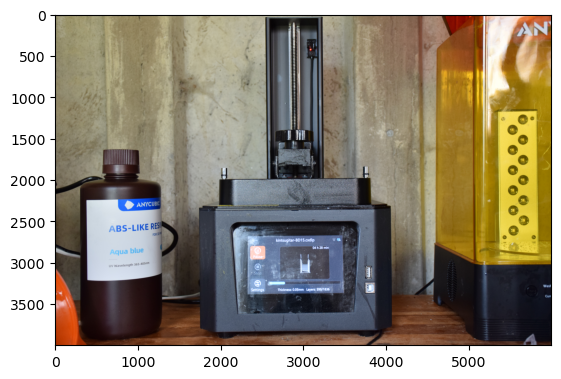

In [7]:
plt.imshow(baseline[0])

In [8]:
baseline[0,1990:2010,2090:2110].shape

(20, 20, 3)

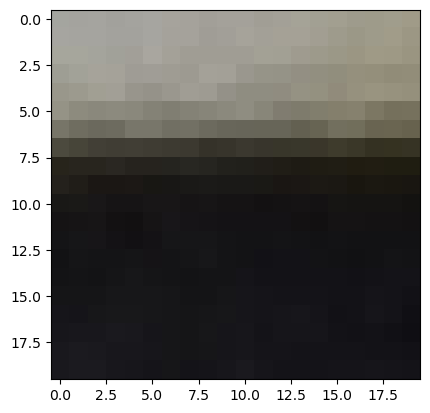

In [9]:
plt.imshow(baseline[0,1990:2010,2090:2110])

In [26]:
def grayscale(rgb):
    result = ((rgb[..., 0] * 0.2125) +
              (rgb[..., 1] * 0.7154) +
              (rgb[..., 2] * 0.0721))
    return result

In [10]:
def reduce_to_20x20(im):
    reduced = im[:,1990:2010,2090:2110]
    return da.array(reduced)

In [30]:
smoothed_image = ndfilters.gaussian_filter(combined_image, sigma=[1, 1])

NameError: name 'combined_image' is not defined

In [ ]:
threshold_value = 0.75 * da.max(smoothed_image).compute()
print(threshold_value)
threshold_image = smoothed_image > threshold_value
plt.imshow(threshold_image, cmap='gray')

In [ ]:
label_image, num_labels = dask_image.ndmeasure.label(threshold_image)
print("Number of labels:", int(num_labels))
plt.imshow(label_image, cmap='viridis')

In [ ]:
index = list(range(int(num_labels)))  # Note that we're including the background label=0 here, too.
out_dtype = float  # The data type we want to use for our results.
default = None     # The value to return if an element of index does not exist in the label image.
mean_values = dask_image.ndmeasure.labeled_comprehension(combined_image, label_image, index, dask_image.ndmeasure.mean, out_dtype, default, pass_positions=False)
print(mean_values.compute())
stdev_values = dask_image.ndmeasure.labeled_comprehension(combined_image, label_image, index, dask_image.ndmeasure.standard_deviation, out_dtype, default, pass_positions=False)
import pandas as pd

df = pd.DataFrame()
df['label'] = index
df['mean'] = mean_values.compute()
df['standard_deviation'] = stdev_values.compute()

df.head()

# Repeat with random baseline images

## use dask_ml.cluster.KMeans

In [11]:
baseline.shape

(1, 4000, 6000, 3)

In [12]:
tbt = reduce_to_20x20(baseline)
# del baseline
tbt.shape

(1, 20, 20, 3)

In [13]:
tbt.compute()

array([[[[164, 165, 159],
         [164, 163, 158],
         [165, 164, 159],
         ...,
         [158, 155, 138],
         [160, 157, 140],
         [160, 155, 136]],

        [[166, 165, 160],
         [165, 164, 159],
         [165, 164, 159],
         ...,
         [158, 155, 138],
         [161, 156, 137],
         [156, 151, 132]],

        [[166, 166, 156],
         [166, 166, 156],
         [164, 164, 156],
         ...,
         [159, 154, 134],
         [158, 153, 133],
         [154, 149, 129]],

        ...,

        [[ 23,  22,  27],
         [ 24,  23,  28],
         [ 24,  23,  28],
         ...,
         [ 19,  18,  23],
         [ 17,  16,  21],
         [ 15,  14,  19]],

        [[ 25,  24,  29],
         [ 27,  26,  31],
         [ 26,  25,  30],
         ...,
         [ 19,  18,  23],
         [ 19,  18,  23],
         [ 18,  17,  22]],

        [[ 25,  24,  29],
         [ 27,  26,  31],
         [ 27,  26,  31],
         ...,
         [ 22,  21,  26],
        

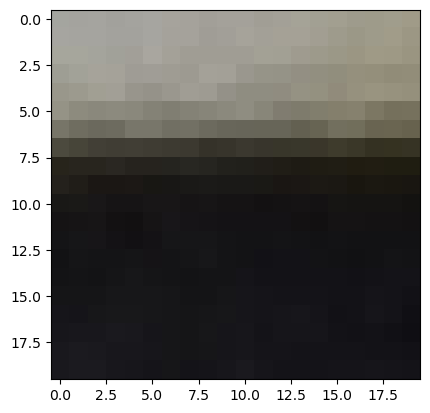

In [14]:
plt.imshow(tbt[0])

In [15]:
to_compare = dask_image.imread.imread(f"{subfolder}/*.JPG")

In [16]:
# to_compare.visualize()

In [17]:
to_compare

dask.array<_map_read_frame, shape=(1592, 4000, 6000, 3), dtype=uint8, chunksize=(1, 4000, 6000, 3), chunktype=numpy.ndarray>

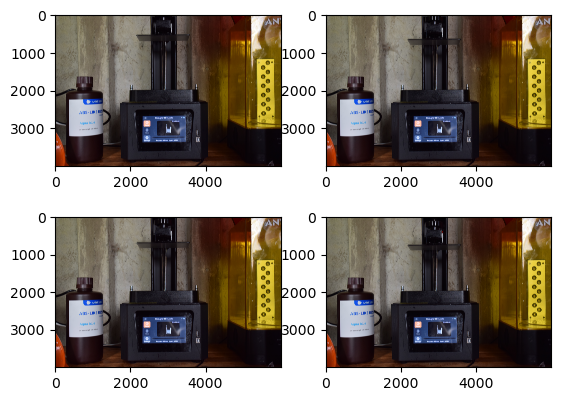

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].imshow(to_compare[0])
ax[0,1].imshow(to_compare[1])
ax[1,0].imshow(to_compare[2])
ax[1,1].imshow(to_compare[3])
plt.show()

In [19]:
tbt_all = reduce_to_20x20(to_compare)
tbt_all

dask.array<getitem, shape=(1592, 20, 20, 3), dtype=uint8, chunksize=(1, 20, 20, 3), chunktype=numpy.ndarray>

In [20]:
#tbt_all.compute()

In [21]:
# tbt_all.visualize()

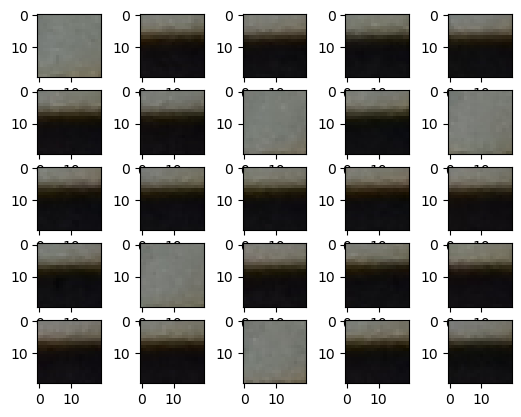

In [31]:
fig, ax = plt.subplots(nrows=5, ncols=5)
k=200
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(tbt_all[k])
        k+=1
plt.show()

In [23]:
tbt_all.compute()

array([[[[15,  9, 13],
         [15,  9, 13],
         [13,  7, 11],
         ...,
         [14,  9, 13],
         [14,  9, 13],
         [15, 10, 14]],

        [[14,  7, 14],
         [15,  8, 15],
         [13,  6, 13],
         ...,
         [14,  9, 15],
         [14,  9, 15],
         [13,  8, 14]],

        [[14,  9, 15],
         [15,  8, 15],
         [14,  7, 14],
         ...,
         [14,  9, 15],
         [14,  9, 15],
         [14,  9, 15]],

        ...,

        [[18, 16, 21],
         [19, 17, 22],
         [19, 17, 22],
         ...,
         [18, 16, 21],
         [17, 15, 20],
         [17, 15, 20]],

        [[19, 17, 22],
         [19, 17, 22],
         [19, 17, 22],
         ...,
         [17, 15, 20],
         [16, 14, 19],
         [17, 15, 20]],

        [[17, 15, 20],
         [18, 16, 21],
         [18, 16, 21],
         ...,
         [19, 17, 22],
         [19, 17, 22],
         [19, 17, 22]]],


       [[[20, 12, 10],
         [22, 13, 14],
         [20, 

In [24]:
def compare_to_baseline(b,i):
    return abs(i - b)

In [ ]:
dif = compare_to_baseline(tbt,tbt_all)
dif
#dif.visualize()

In [ ]:
plt.imshow(dif[4])

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=5)
k=0
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(dif[k])
        k+=1
plt.show()

In [98]:
dif[7].compute()

array([[[  3,   3,   3],
        [  2,   4,   1],
        [  1,   3,   0],
        ...,
        [253, 253, 255],
        [250, 250, 250],
        [252, 251, 254]],

       [[  4,   5,   2],
        [  3,   4,   1],
        [255,   0, 253],
        ...,
        [254, 254, 254],
        [251, 250, 253],
        [254, 254, 254]],

       [[  1,   1,   3],
        [  4,   4,   6],
        [255, 255, 255],
        ...,
        [246, 248, 251],
        [249, 249, 250],
        [253, 253, 253]],

       ...,

       [[  1,   2, 255],
        [255,   0, 253],
        [255,   0, 253],
        ...,
        [254, 255, 252],
        [255,   0, 253],
        [  4,   5,   2]],

       [[  0,   1, 254],
        [252, 253, 250],
        [253, 254, 251],
        ...,
        [254, 255, 252],
        [255, 255, 255],
        [  0,   0,   0]],

       [[255,   0, 253],
        [252, 253, 250],
        [255,   0, 253],
        ...,
        [255,   0, 253],
        [  0,   1, 254],
        [  0,   1, 254]]